<a href="https://colab.research.google.com/github/AndresNei20/Nebulash/blob/main/DatosAnalizados/An%C3%A1lisis_de_datos_recopilados_Nebulash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Librerias**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Medición de datos generales (mean, std, count, min, max)

El valor de mean para la columna RETOS TOTALES es: 10.75

Columna seleccionada - RETOS TOTALES:
    RETOS TOTALES
21              3
20              4
22              6
23              8
16              9
5               9
14             10
2              10
8              10
6              11
0              11
17             11
10             11
3              12
1              12
15             12
4              12
9              13
19             13
13             13
18             14
12             14
11             15
7              15


<ipython-input-86-043c14d9a0a8>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[order_criteria], y=[selected_stat], palette='viridis')


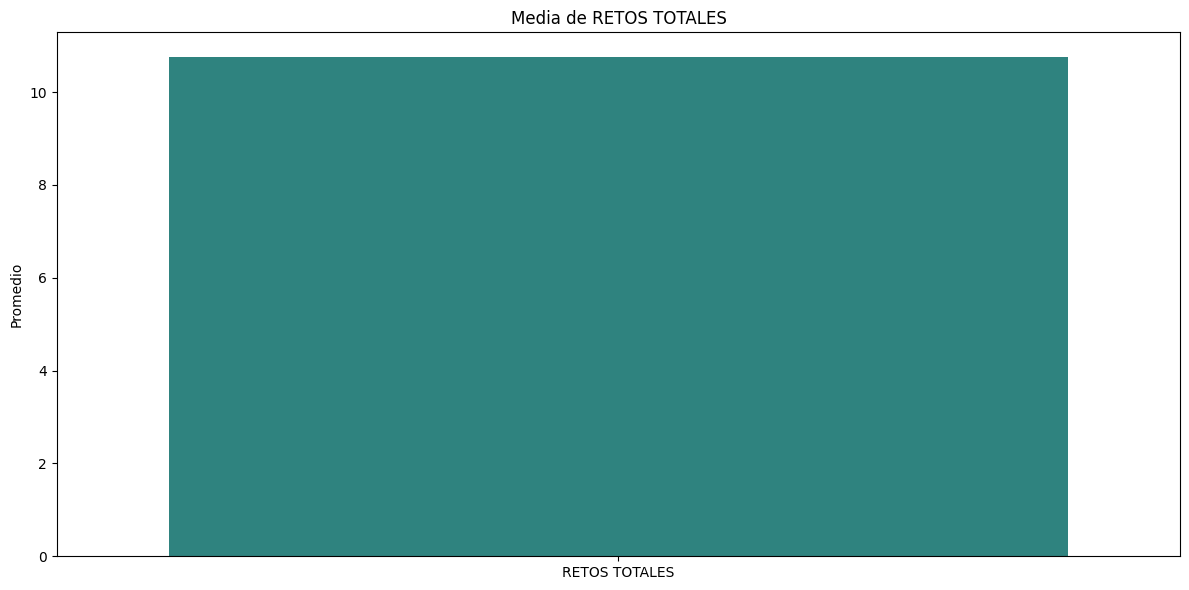

In [86]:
# Criterios de selección
order_criteria = "RETOS TOTALES"  # @param ["ID", "NOMBRE", "RETOS TOTALES", "RETOS GANADOS", "RETOS NO GANADOS", "RETOS INDIVIDUALES TOTALES", "RETOS INDIVIDUALES GANADOS", "RETOS COMPETITIVOS TOTALES", "RETOS COMPETITIVOS GANADOS", "RETOS COLABORATIVOS TOTALES", "RETOS COLABORATIVOS GANADOS", "PLANETAS GANADOS (con retos)", "PLANETAS REGALADOS  (-)", "PLANETAS RECIBIDOS (+)", "PLANETAS ROBADOS (+)", "PLANETAS QUE LE ROBARON (-)", "PLANETAS AL FINAL DE LA PARTIDA", "SATISFACCIÓN (1-5)", "ESFUERZO (1-5)"]
stat_criteria = "mean"  # @param["count", "mean", "std", "min", "max", "25%", "50%", "75%"]

is_ascending = True  # Puedes cambiar a False si quieres orden descendente
df.sort_values(by=order_criteria, ascending=is_ascending, inplace=True)

df_clean = df.dropna()

stat_summary = df_clean[order_criteria].describe()

selected_stat = stat_summary[stat_criteria] if stat_criteria in stat_summary.index else None

if selected_stat is not None:
    print(f'El valor de {stat_criteria} para la columna {order_criteria} es: {selected_stat}')
else:
    print(f'El criterio "{stat_criteria}" no es válido. Selecciona uno de: {stat_summary.index.tolist()}')

# Mostrar solo la columna seleccionada
df_clean_filtered = df_clean[[order_criteria]]
print(f"\nColumna seleccionada - {order_criteria}:")
print(df_clean_filtered)

# Gráfico
plt.figure(figsize=(12, 6))

if stat_criteria == "count":
    df_clean_filtered[order_criteria].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(f'Frecuencia de {order_criteria}')
    plt.xlabel(order_criteria)
    plt.ylabel('Frecuencia')

elif stat_criteria == "mean":
    sns.barplot(x=[order_criteria], y=[selected_stat], palette='viridis')
    plt.title(f'Media de {order_criteria}')
    plt.ylabel('Promedio')

elif stat_criteria == "std":
    sns.barplot(x=[order_criteria], y=[selected_stat], palette='viridis')
    plt.title(f'Desviación Estándar de {order_criteria}')
    plt.ylabel('Desviación Estándar')

elif stat_criteria == "min":
    sns.barplot(x=[order_criteria], y=[selected_stat], palette='viridis')
    plt.title(f'Mínimo de {order_criteria}')
    plt.ylabel('Mínimo')

elif stat_criteria == "max":
    sns.barplot(x=[order_criteria], y=[selected_stat], palette='viridis')
    plt.title(f'Máximo de {order_criteria}')
    plt.ylabel('Máximo')

elif stat_criteria in ["25%", "50%", "75%"]:
    sns.boxplot(x=df_clean[order_criteria], color='lightblue')
    plt.title(f'Distribución de {order_criteria} ({stat_criteria} Percentil)')
    plt.xlabel(order_criteria)

else:
    print(f'No hay gráfico disponible para el criterio "{stat_criteria}".')

plt.tight_layout()
plt.show()


# Comparación Satisfacción x Esfuerzo

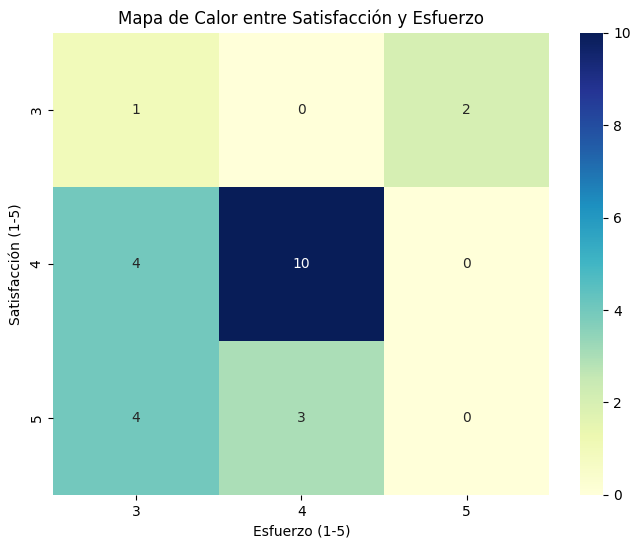

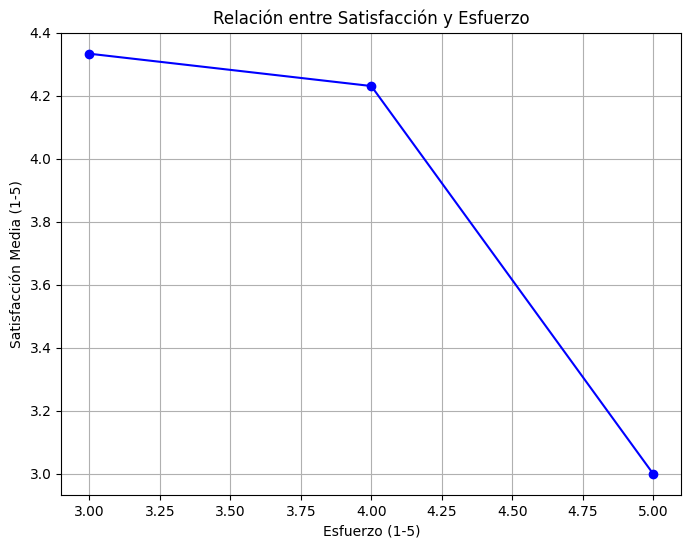

In [13]:
# Mapa de calor para la relación entre Satisfacción y Esfuerzo
plt.figure(figsize=(8, 6))
heatmap_data = df.groupby(['SATISFACCIÓN (1-5)', 'ESFUERZO (1-5)']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Mapa de Calor entre Satisfacción y Esfuerzo')
plt.xlabel('Esfuerzo (1-5)')
plt.ylabel('Satisfacción (1-5)')
plt.show()

line_data = df.groupby('ESFUERZO (1-5)')['SATISFACCIÓN (1-5)'].mean()

# Gráfico de línea
plt.figure(figsize=(8, 6))
plt.plot(line_data.index, line_data.values, marker='o', linestyle='-', color='b')

plt.title('Relación entre Satisfacción y Esfuerzo')
plt.xlabel('Esfuerzo (1-5)')
plt.ylabel('Satisfacción Media (1-5)')

# Mostrar el gráfico
plt.grid(True)
plt.show()

Se puede concluir que el esfuerzo y la satisfacción se comportan en forma de parábola en donde cuando el esfuerzo es muy bajo, la satisfacción disminuye por que se vuelve monótono y facil de jugar. Si es al contrario este se vuelve complejo y trabajoso. La idea es mantener un equilibrio

# Cantidad de retos colaborativos ganados x esfuerzo

    RETOS COLABORATIVOS GANADOS  ESFUERZO (1-5)
0                             1               4
1                             1               4
2                             1               3
3                             1               4
4                             2               3
5                             1               3
6                             1               4
7                             2               3
8                             2               4
9                             1               3
10                            2               3
11                            1               5
12                            1               3
13                            2               4
14                            0               3
15                            1               4
16                            0               3
17                            1               4
18                            1               4
19                            0         

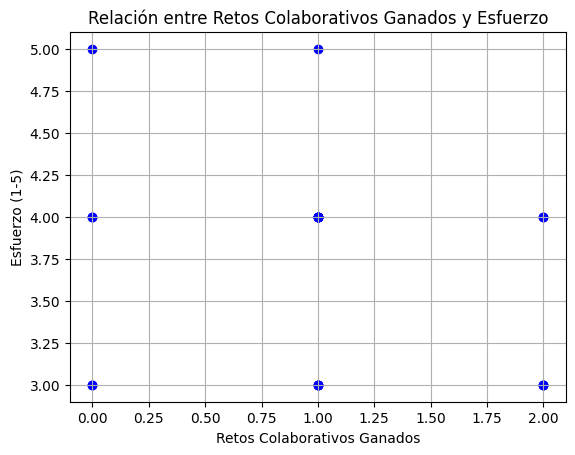

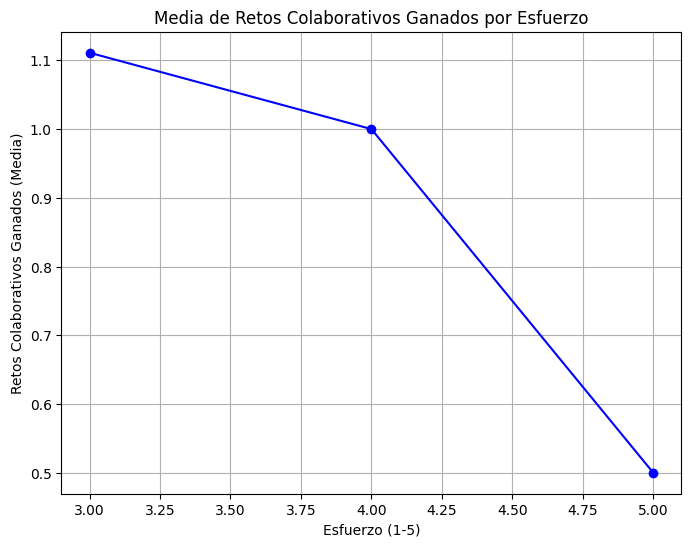

In [14]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTj0lfMRnL-OI4O1uB0moHq2iim9LOCC1gbDjmwbTjKC61QJTM4vQ7jPaCP_Gufga34SvjtQYUxKYnL/pub?output=csv')
print(df[["RETOS COLABORATIVOS GANADOS", "ESFUERZO (1-5)"]])

#Gráfico de dispersión
plt.scatter(df["RETOS COLABORATIVOS GANADOS"], df["ESFUERZO (1-5)"], color='blue')
plt.title('Relación entre Retos Colaborativos Ganados y Esfuerzo')
plt.xlabel('Retos Colaborativos Ganados')
plt.ylabel('Esfuerzo (1-5)')
plt.grid(True)

#Gráfico de linea
line_data = df.groupby('ESFUERZO (1-5)')['RETOS COLABORATIVOS GANADOS'].mean()

plt.figure(figsize=(8, 6))
plt.plot(line_data.index, line_data.values, marker='o', linestyle='-', color='b')
plt.title('Media de Retos Colaborativos Ganados por Esfuerzo')
plt.xlabel('Esfuerzo (1-5)')
plt.ylabel('Retos Colaborativos Ganados (Media)')
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [11]:
correlacion = df["RETOS COLABORATIVOS GANADOS"].corr(df["ESFUERZO (1-5)"])
print("Correlación:", correlacion)

Correlación: -0.21130821751814968


Las personas que ganaron más puntos por colaboracion reportaron un sentimiento de esfuerzo entre 3-4, menor que las personas que ganaban menos puntos por colaboracion. En conclusion, la colaboracion efecta la percepcion del esfuerzo requerido por el usuario. Asimismo, las valores ideales para una satisfaccion mayor (mostrado en el mapa de calor) son entre 3-4 de esfuerzo, por lo tanto el colaborar ayuda a mantener una percepcion del esfuerzo balanceada y una satisfaccion mayor

# Cantidad de retos colaborativos ganados vs satisfacción

    RETOS COLABORATIVOS GANADOS  SATISFACCIÓN (1-5)
21                            1                   4
20                            1                   4
22                            0                   3
23                            0                   4
16                            0                   4
5                             1                   5
14                            0                   3
2                             1                   4
8                             2                   4
10                            2                   5
17                            1                   4
6                             1                   4
0                             1                   5
3                             1                   4
1                             1                   4
15                            1                   4
4                             2                   5
9                             1                   5
19          

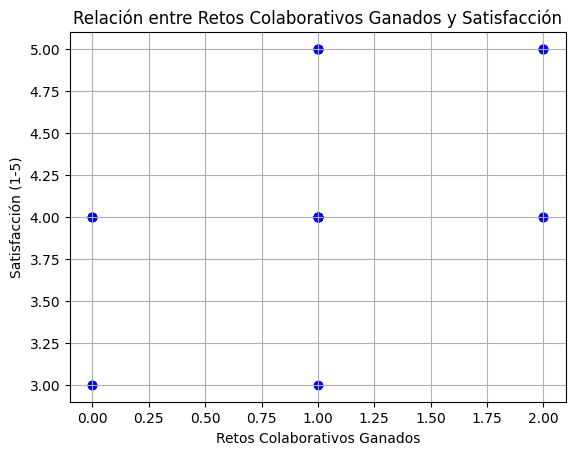

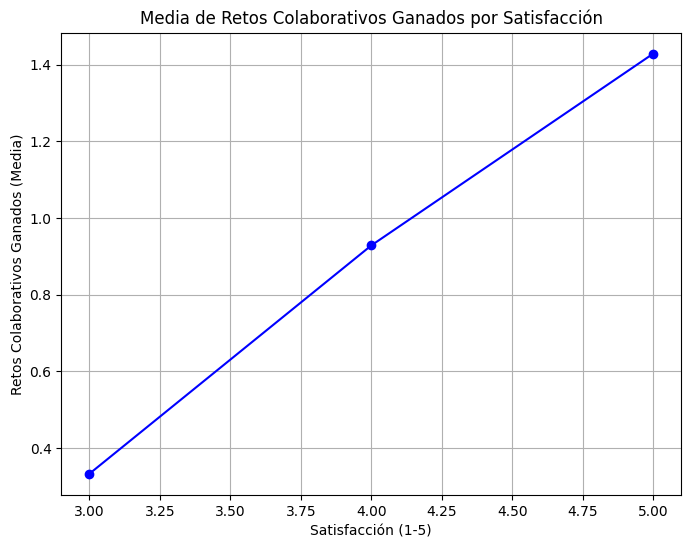

In [66]:
print(df[["RETOS COLABORATIVOS GANADOS", "SATISFACCIÓN (1-5)"]])

#Gráfico de dispersión
plt.scatter(df["RETOS COLABORATIVOS GANADOS"], df["SATISFACCIÓN (1-5)"], color='blue')
plt.title('Relación entre Retos Colaborativos Ganados y Satisfacción')
plt.xlabel('Retos Colaborativos Ganados')
plt.ylabel('Satisfacción (1-5)')
plt.grid(True)

#Gráfico de linea
line_data = df.groupby('SATISFACCIÓN (1-5)')['RETOS COLABORATIVOS GANADOS'].mean()

plt.figure(figsize=(8, 6))
plt.plot(line_data.index, line_data.values, marker='o', linestyle='-', color='b')
plt.title('Media de Retos Colaborativos Ganados por Satisfacción')
plt.xlabel('Satisfacción (1-5)')
plt.ylabel('Retos Colaborativos Ganados (Media)')
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [85]:
# Calcular la correlación
correlation = df['RETOS COLABORATIVOS GANADOS'].corr(df['SATISFACCIÓN (1-5)'])
print(f'La correlación entre Retos Colaborativos Ganados y Satisfacción (1-5) es: {correlation:.2f}')

La correlación entre Retos Colaborativos Ganados y Satisfacción (1-5) es: 0.52


# Cantidad de retos competitivos ganados x satisfaccion

    RETOS COMPETITIVOS GANADOS  SATISFACCIÓN (1-5)
0                            1                   5
1                            2                   4
2                            1                   4
3                            0                   4
4                            1                   5
5                            0                   5
6                            1                   4
7                            1                   4
8                            1                   4
9                            2                   5
10                           1                   5
11                           0                   3
12                           2                   4
13                           0                   5
14                           1                   3
15                           1                   4
16                           2                   4
17                           1                   4
18                           1 

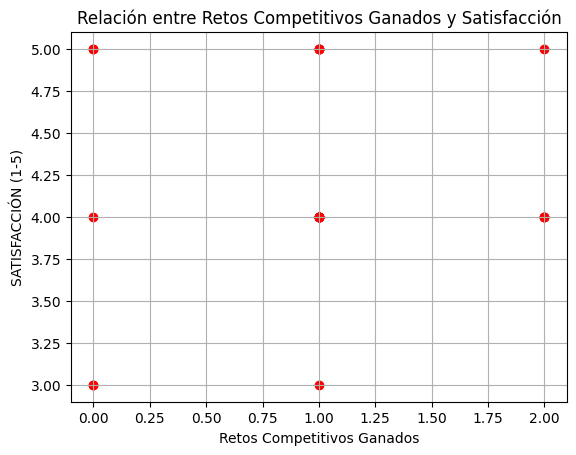

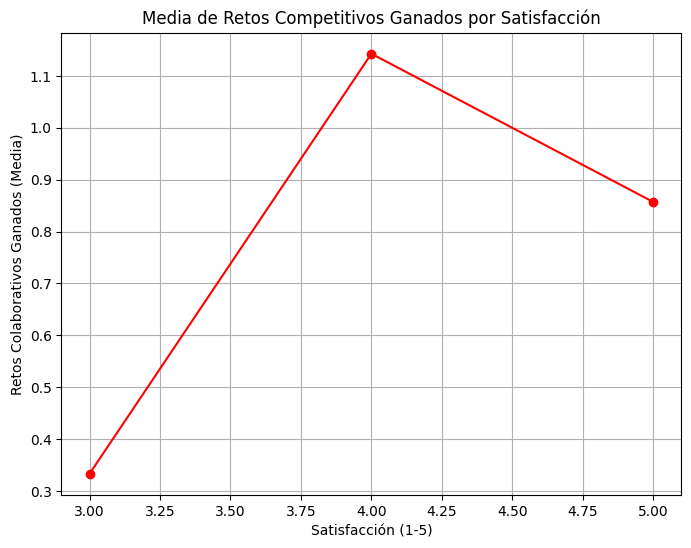

In [21]:
print(df[["RETOS COMPETITIVOS GANADOS", "SATISFACCIÓN (1-5)"]])

plt.scatter(df["RETOS COMPETITIVOS GANADOS"], df["SATISFACCIÓN (1-5)"], color='red')
plt.title('Relación entre Retos Competitivos Ganados y Satisfacción')
plt.xlabel('Retos Competitivos Ganados')
plt.ylabel('SATISFACCIÓN (1-5)')
plt.grid(True)

#Gráfico de linea
line_data = df.groupby('SATISFACCIÓN (1-5)')['RETOS COMPETITIVOS GANADOS'].mean()

plt.figure(figsize=(8, 6))
plt.plot(line_data.index, line_data.values, marker='o', linestyle='-', color='r')
plt.title('Media de Retos Competitivos Ganados por Satisfacción')
plt.xlabel('Satisfacción (1-5)')
plt.ylabel('Retos Colaborativos Ganados (Media)')
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [73]:
correlation = df[["RETOS COMPETITIVOS GANADOS", "SATISFACCIÓN (1-5)"]].corr().iloc[0, 1]
print(f'La correlación entre Retos Competitivos Ganados y Satisfacción (1-5) es: {correlation:.2f}')


La correlación entre Retos Competitivos Ganados y Satisfacción (1-5) es: 0.13


# Cantidad de retos competitivos ganados x Esfuerzo

    RETOS COMPETITIVOS GANADOS  ESFUERZO (1-5)
21                           1               4
20                           1               4
22                           0               5
23                           1               4
16                           2               3
5                            0               3
14                           1               3
2                            1               3
8                            1               4
10                           1               3
17                           1               4
6                            1               4
0                            1               4
3                            0               4
1                            2               4
15                           1               4
4                            1               3
9                            2               3
19                           1               4
13                           0               4
18           

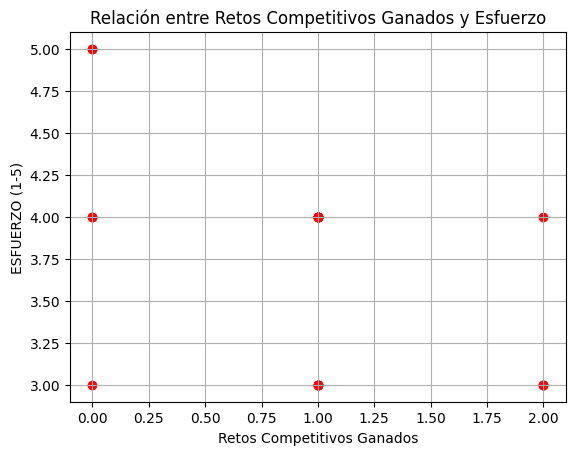

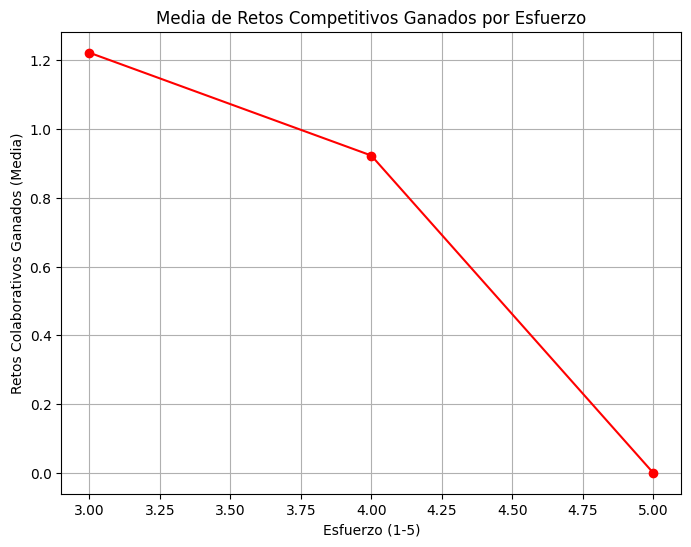

In [67]:
print(df[["RETOS COMPETITIVOS GANADOS", "ESFUERZO (1-5)"]])

plt.scatter(df["RETOS COMPETITIVOS GANADOS"], df["ESFUERZO (1-5)"], color='red')
plt.title('Relación entre Retos Competitivos Ganados y Esfuerzo')
plt.xlabel('Retos Competitivos Ganados')
plt.ylabel('ESFUERZO (1-5)')
plt.grid(True)

#Gráfico de linea
line_data = df.groupby('ESFUERZO (1-5)')['RETOS COMPETITIVOS GANADOS'].mean()

plt.figure(figsize=(8, 6))
plt.plot(line_data.index, line_data.values, marker='o', linestyle='-', color='r')
plt.title('Media de Retos Competitivos Ganados por Esfuerzo')
plt.xlabel('Esfuerzo (1-5)')
plt.ylabel('Retos Colaborativos Ganados (Media)')
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [74]:
correlation = df[["RETOS COMPETITIVOS GANADOS", "ESFUERZO (1-5)"]].corr().iloc[0, 1]
print(f'La correlación entre Retos Competitivos Ganados y Esfuerzo (1-5) es: {correlation:.2f}')

La correlación entre Retos Competitivos Ganados y Esfuerzo (1-5) es: -0.48



Cuando se pierden retos competitivos, el esfuerzo percibido tiende a sentirse mayor, ya que los jugadores pueden experimentar frustración o una sensación de dificultad.

# Satisfaccion x planetas ganados

    PLANETAS GANADOS (con retos)  SATISFACCIÓN (1-5)
0                              4                   5
1                              5                   4
2                              3                   4
3                              3                   4
4                              5                   5
5                              3                   5
6                              3                   4
7                              4                   4
8                              4                   4
9                              4                   5
10                             5                   5
11                             3                   3
12                             5                   4
13                             4                   5
14                             3                   3
15                             3                   4
16                             3                   4
17                             4              

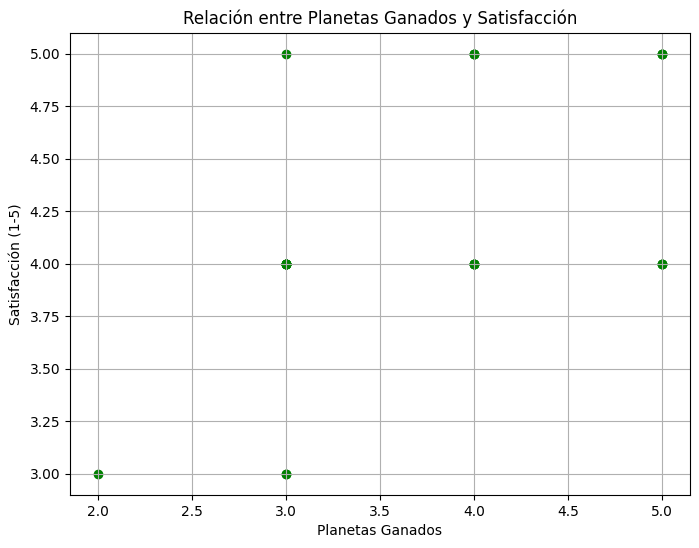

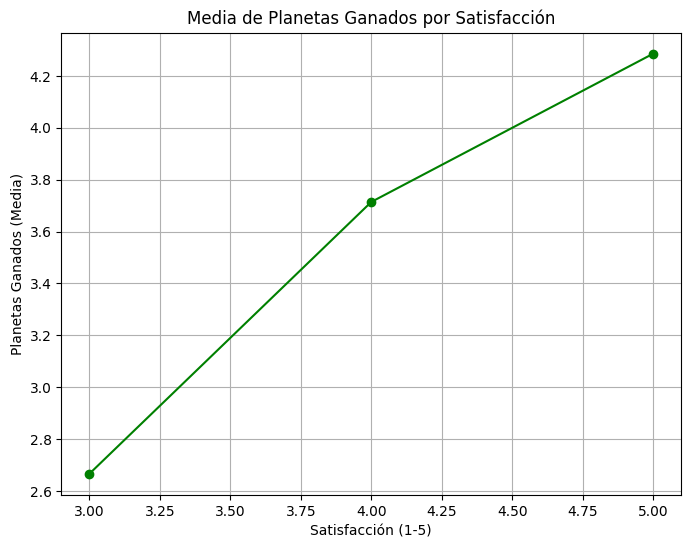

In [23]:
print(df[["PLANETAS GANADOS (con retos)", "SATISFACCIÓN (1-5)"]])

# Gráfico de dispersión entre Planetas Ganados y Satisfacción
plt.figure(figsize=(8, 6))
plt.scatter(df["PLANETAS GANADOS (con retos)"], df["SATISFACCIÓN (1-5)"], color='green')
plt.title('Relación entre Planetas Ganados y Satisfacción')
plt.xlabel('Planetas Ganados')
plt.ylabel('Satisfacción (1-5)')
plt.grid(True)
plt.show()

# Gráfico de linea
line_data = df.groupby('SATISFACCIÓN (1-5)')['PLANETAS GANADOS (con retos)'].mean()

plt.figure(figsize=(8, 6))
plt.plot(line_data.index, line_data.values, marker='o', linestyle='-', color='green')

plt.title('Media de Planetas Ganados por Satisfacción')
plt.xlabel('Satisfacción (1-5)')
plt.ylabel('Planetas Ganados (Media)')
plt.grid(True)

plt.show()

In [75]:
correlation = df["PLANETAS GANADOS (con retos)"].corr(df["SATISFACCIÓN (1-5)"])
print(f'La correlación entre Planetas Ganados y Satisfacción (1-5) es: {correlation:.2f}')

La correlación entre Planetas Ganados y Satisfacción (1-5) es: 0.53


# Promedio de retos ganados, retos perdidos, retos individuales, retos colaborativos, retos competitivos


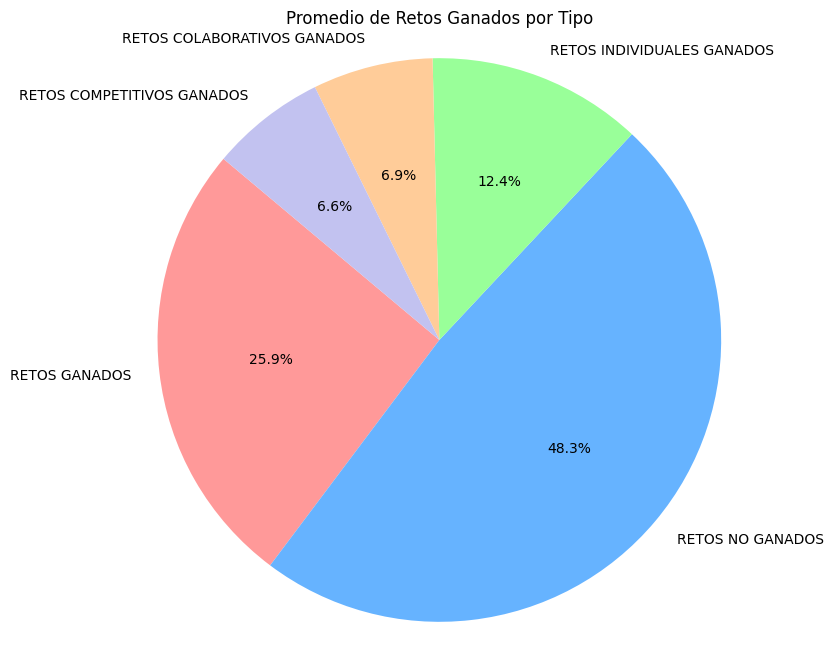

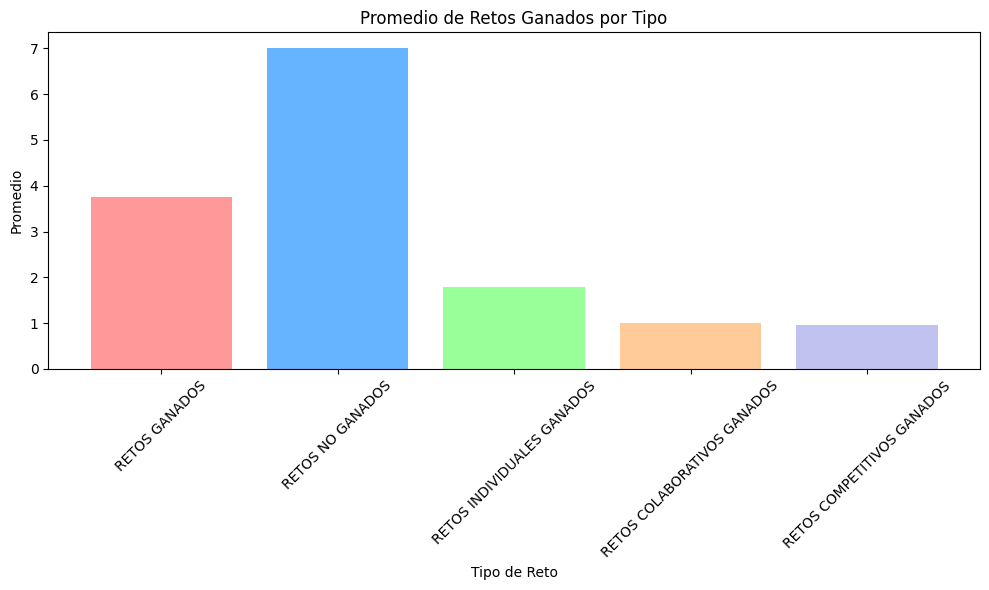

In [25]:
# Calcular promedios
promedios = {
    'RETOS GANADOS': df['RETOS GANADOS'].mean(),
    'RETOS NO GANADOS': df['RETOS NO GANADOS'].mean(),
    'RETOS INDIVIDUALES GANADOS': df['RETOS INDIVIDUALES GANADOS'].mean(),
    'RETOS COLABORATIVOS GANADOS': df['RETOS COLABORATIVOS GANADOS'].mean(),
    'RETOS COMPETITIVOS GANADOS': df['RETOS COMPETITIVOS GANADOS'].mean(),
}

# Gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(promedios.values(), labels=promedios.keys(), autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'])
plt.title('Promedio de Retos Ganados por Tipo')
plt.axis('equal')  # Asegura que el gráfico sea un círculo
plt.show()

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(promedios.keys(), promedios.values(), color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'])
plt.title('Promedio de Retos Ganados por Tipo')
plt.xlabel('Tipo de Reto')
plt.ylabel('Promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Retos Competitivos Ganados x Planetas Robados

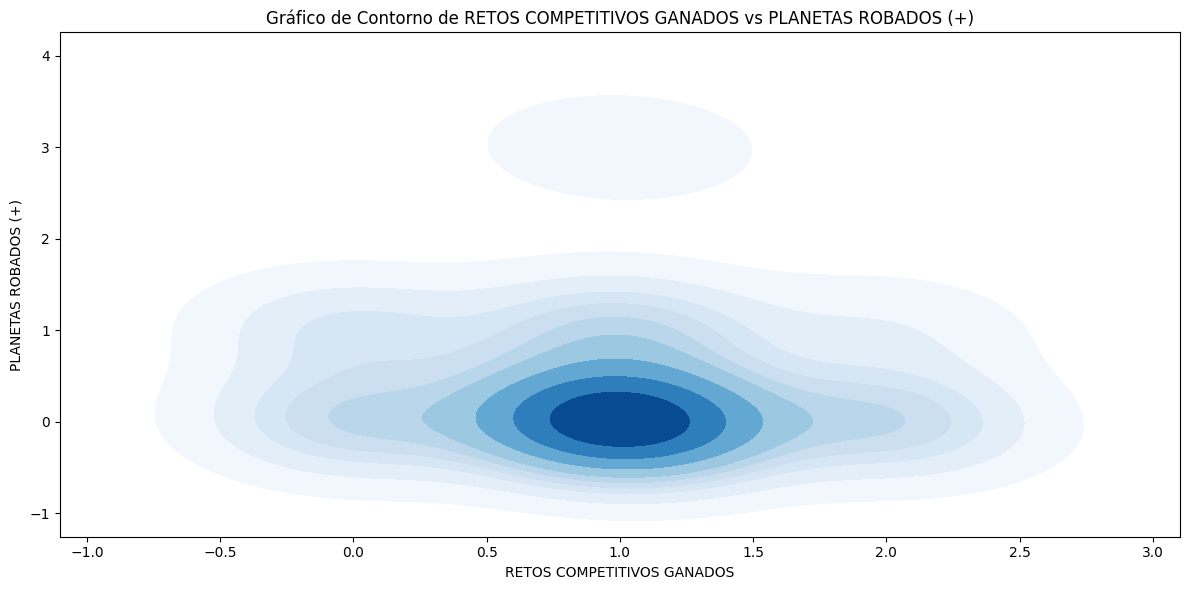

<ipython-input-71-7e545fbd3b71>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=x_criteria, y=y_criteria, data=df_clean, palette='pastel')


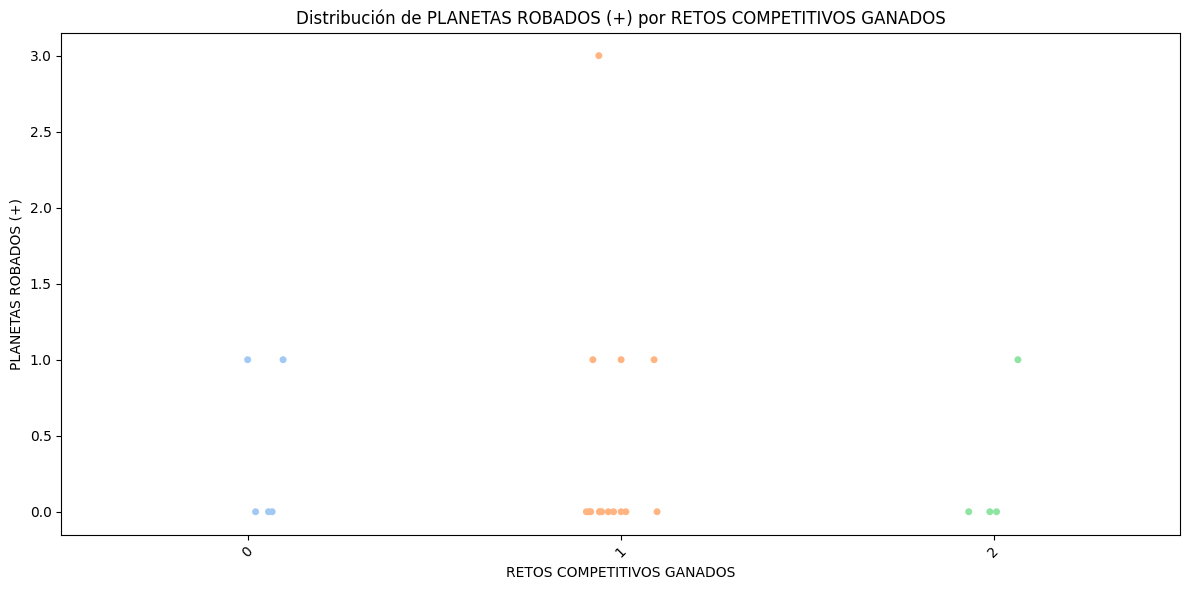

In [71]:
# Criterios de selección
x_criteria = "RETOS COMPETITIVOS GANADOS"
y_criteria = "PLANETAS ROBADOS (+)"

# Eliminar filas con datos faltantes
df_clean = df[[x_criteria, y_criteria]].dropna()

# Gráfico de Contorno
plt.figure(figsize=(12, 6))
sns.kdeplot(x=x_criteria, y=y_criteria, data=df_clean, cmap='Blues', fill=True)
plt.title(f'Gráfico de Contorno de {x_criteria} vs {y_criteria}')
plt.xlabel(x_criteria)
plt.ylabel(y_criteria)
plt.tight_layout()
plt.show()

# Gráfico de Puntos
plt.figure(figsize=(12, 6))
sns.stripplot(x=x_criteria, y=y_criteria, data=df_clean, palette='pastel')
plt.title(f'Distribución de {y_criteria} por {x_criteria}')
plt.xlabel(x_criteria)
plt.ylabel(y_criteria)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [76]:
correlation = df_clean[x_criteria].corr(df_clean[y_criteria])
print(f'La correlación entre {x_criteria} y {y_criteria} es: {correlation:.2f}')

La correlación entre RETOS COLABORATIVOS GANADOS y PLANETAS REGALADOS  (-) es: 0.00


# Retos Colaborativos Ganados x Planetas Regalados

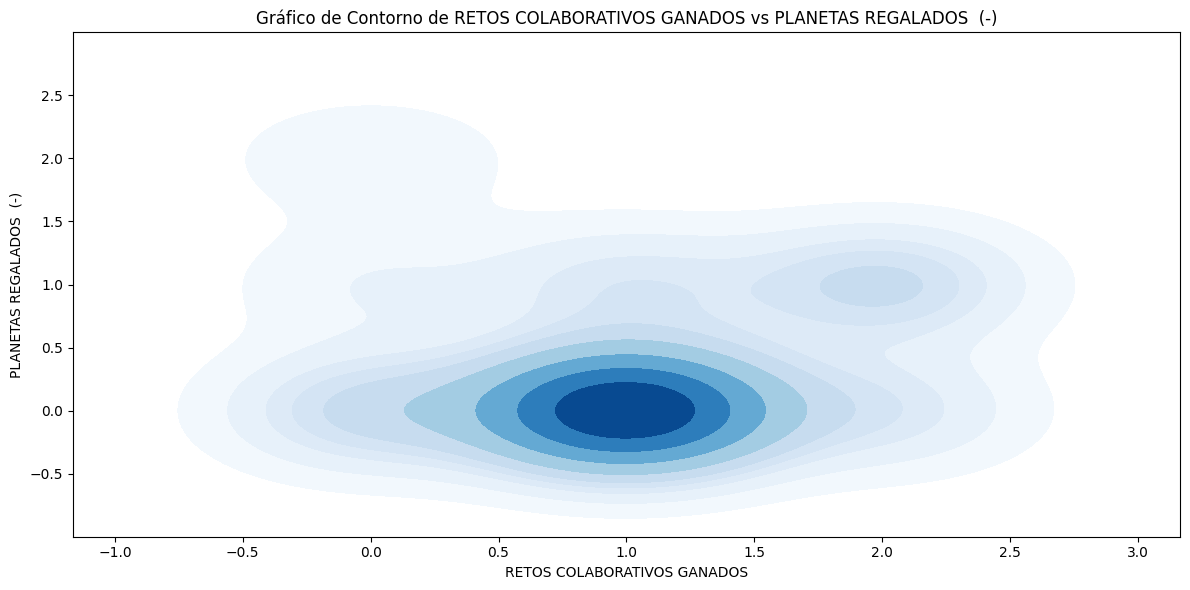

<ipython-input-72-be543750124a>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=x_criteria, y=y_criteria, data=df_clean, palette='pastel')


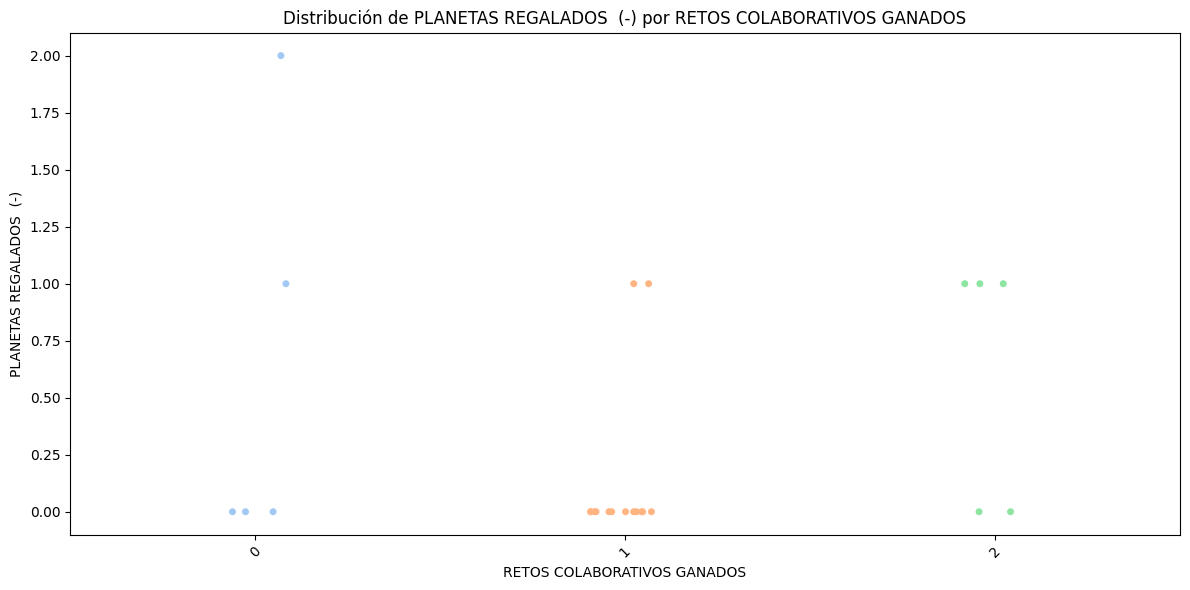

In [72]:
# Criterios de selección
x_criteria = "RETOS COLABORATIVOS GANADOS"
y_criteria = "PLANETAS REGALADOS  (-)"

# Eliminar filas con datos faltantes
df_clean = df[[x_criteria, y_criteria]].dropna()

# Gráfico de Contorno
plt.figure(figsize=(12, 6))
sns.kdeplot(x=x_criteria, y=y_criteria, data=df_clean, cmap='Blues', fill=True)
plt.title(f'Gráfico de Contorno de {x_criteria} vs {y_criteria}')
plt.xlabel(x_criteria)
plt.ylabel(y_criteria)
plt.tight_layout()
plt.show()

# Gráfico de Puntos
plt.figure(figsize=(12, 6))
sns.stripplot(x=x_criteria, y=y_criteria, data=df_clean, palette='pastel')
plt.title(f'Distribución de {y_criteria} por {x_criteria}')
plt.xlabel(x_criteria)
plt.ylabel(y_criteria)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [77]:
correlation = df_clean[x_criteria].corr(df_clean[y_criteria])
print(f'La correlación entre {x_criteria} y {y_criteria} es: {correlation:.2f}')

La correlación entre RETOS COLABORATIVOS GANADOS y PLANETAS REGALADOS  (-) es: 0.00


# Planetas robados x satisfacción

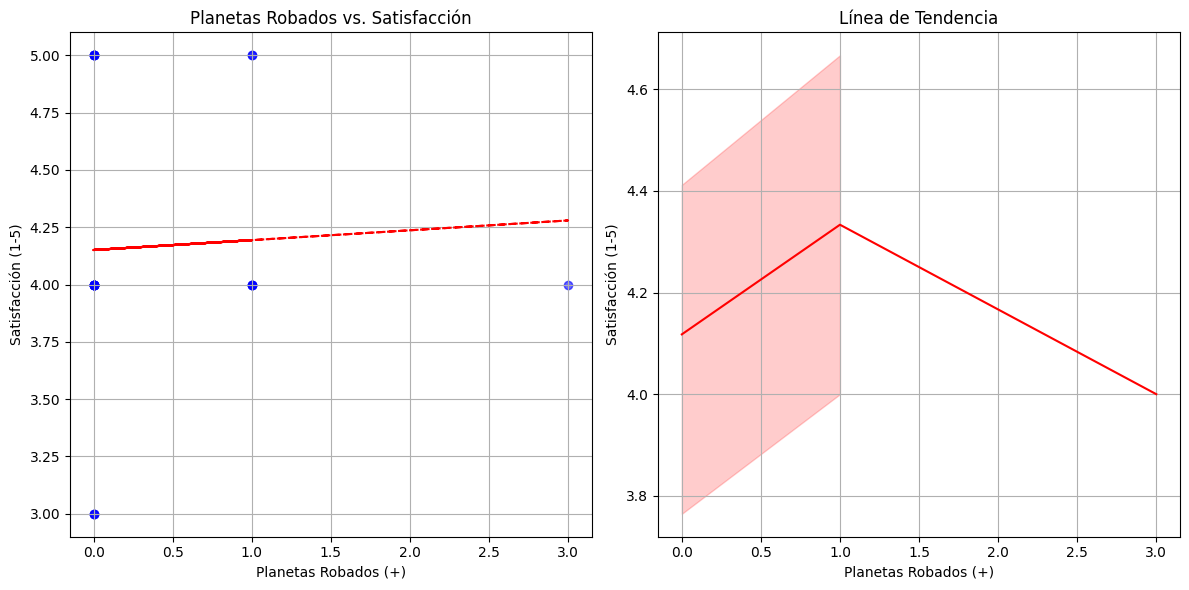

In [28]:
# Gráfico de dispersión
plt.figure(figsize=(12, 6))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(df['PLANETAS ROBADOS (+)'], df['SATISFACCIÓN (1-5)'], color='blue', alpha=0.6)
plt.title('Planetas Robados vs. Satisfacción')
plt.xlabel('Planetas Robados (+)')
plt.ylabel('Satisfacción (1-5)')
plt.grid(True)

# Ajuste de línea de tendencia
slope, intercept, r_value, p_value, std_err = stats.linregress(df['PLANETAS ROBADOS (+)'], df['SATISFACCIÓN (1-5)'])
plt.plot(df['PLANETAS ROBADOS (+)'], intercept + slope * df['PLANETAS ROBADOS (+)'], color='red', linestyle='--')

# Gráfico de líneas de tendencia
plt.subplot(1, 2, 2)
sns.lineplot(x='PLANETAS ROBADOS (+)', y='SATISFACCIÓN (1-5)', data=df, color='red')
plt.title('Línea de Tendencia')
plt.xlabel('Planetas Robados (+)')
plt.ylabel('Satisfacción (1-5)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [78]:
correlation = df['PLANETAS ROBADOS (+)'].corr(df['SATISFACCIÓN (1-5)'])
print(f'La correlación entre Planetas Robados (+) y Satisfacción (1-5) es: {correlation:.2f}')

La correlación entre Planetas Robados (+) y Satisfacción (1-5) es: 0.05



A medida que se roban más planetas, la satisfacción del jugador aumenta porque la sensación de logro crece con cada saqueo exitoso. Esta dinámica añade emoción y recompensa al juego.

# Planetas que le robaron x satisfacción

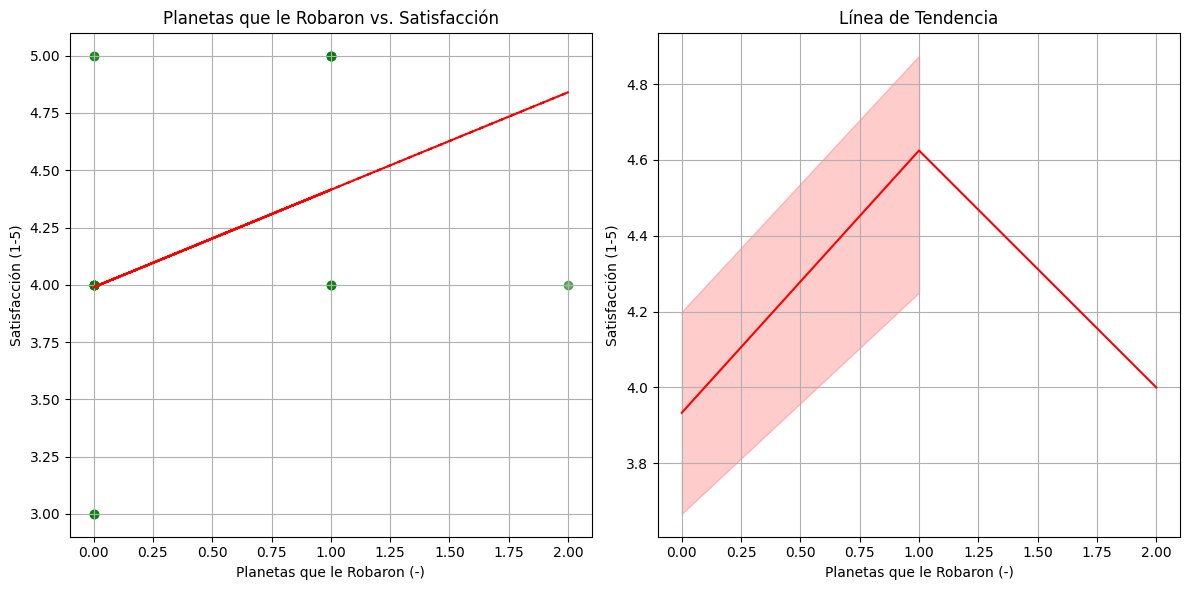

In [61]:
# Gráfico de dispersión
plt.figure(figsize=(12, 6))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(df['PLANETAS QUE LE ROBARON (-)'], df['SATISFACCIÓN (1-5)'], color='green', alpha=0.6)
plt.title('Planetas que le Robaron vs. Satisfacción')
plt.xlabel('Planetas que le Robaron (-)')
plt.ylabel('Satisfacción (1-5)')
plt.grid(True)

# Ajuste de línea de tendencia
slope, intercept, r_value, p_value, std_err = stats.linregress(df['PLANETAS QUE LE ROBARON (-)'], df['SATISFACCIÓN (1-5)'])
plt.plot(df['PLANETAS QUE LE ROBARON (-)'], intercept + slope * df['PLANETAS QUE LE ROBARON (-)'], color='red', linestyle='--')

# Gráfico de líneas de tendencia
plt.subplot(1, 2, 2)
sns.lineplot(x='PLANETAS QUE LE ROBARON (-)', y='SATISFACCIÓN (1-5)', data=df, color='red')
plt.title('Línea de Tendencia')
plt.xlabel('Planetas que le Robaron (-)')
plt.ylabel('Satisfacción (1-5)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [80]:
correlation = df['PLANETAS QUE LE ROBARON (-)'].corr(df['SATISFACCIÓN (1-5)'])
print(f'La correlación entre Planetas que le Robaron (-) y Satisfacción (1-5) es: {correlation:.2f}')

La correlación entre Planetas que le Robaron (-) y Satisfacción (1-5) es: 0.39


# Planetas regalados x satisfaccion


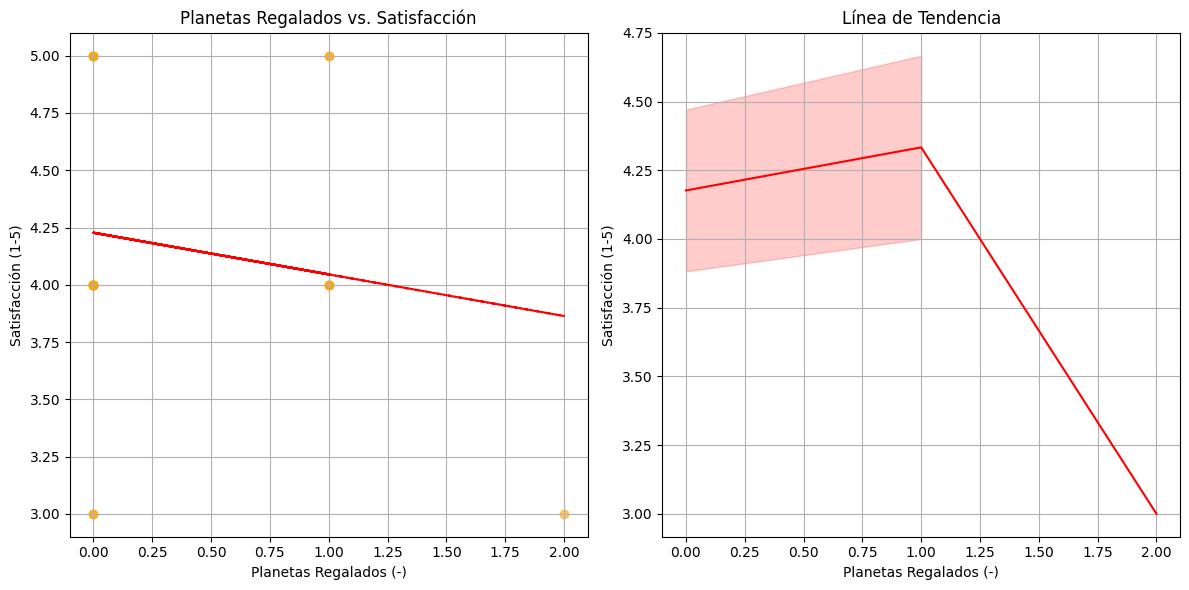

In [31]:
# Gráfico de dispersión
plt.figure(figsize=(12, 6))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(df['PLANETAS REGALADOS  (-)'], df['SATISFACCIÓN (1-5)'], color='orange', alpha=0.6)
plt.title('Planetas Regalados vs. Satisfacción')
plt.xlabel('Planetas Regalados (-)')
plt.ylabel('Satisfacción (1-5)')
plt.grid(True)

# Ajuste de línea de tendencia
slope, intercept, r_value, p_value, std_err = stats.linregress(df['PLANETAS REGALADOS  (-)'], df['SATISFACCIÓN (1-5)'])
plt.plot(df['PLANETAS REGALADOS  (-)'], intercept + slope * df['PLANETAS REGALADOS  (-)'], color='red', linestyle='--')

# Gráfico de líneas de tendencia
plt.subplot(1, 2, 2)
sns.lineplot(x='PLANETAS REGALADOS  (-)', y='SATISFACCIÓN (1-5)', data=df, color='red')
plt.title('Línea de Tendencia')
plt.xlabel('Planetas Regalados (-)')
plt.ylabel('Satisfacción (1-5)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [81]:
correlation = df['PLANETAS REGALADOS  (-)'].corr(df['SATISFACCIÓN (1-5)'])
print(f'La correlación entre Planetas Regalados (-) y Satisfacción (1-5) es: {correlation:.2f}')

La correlación entre Planetas Regalados (-) y Satisfacción (1-5) es: -0.16


A medida que los jugadores se ven obligados a regalar uno de sus propios planetas a otros, su satisfacción disminuye. Esto se debe probablemente a la sensación de pérdida y la reducción del control sobre su progreso.

# Planetas que le regalaron x satisfacción

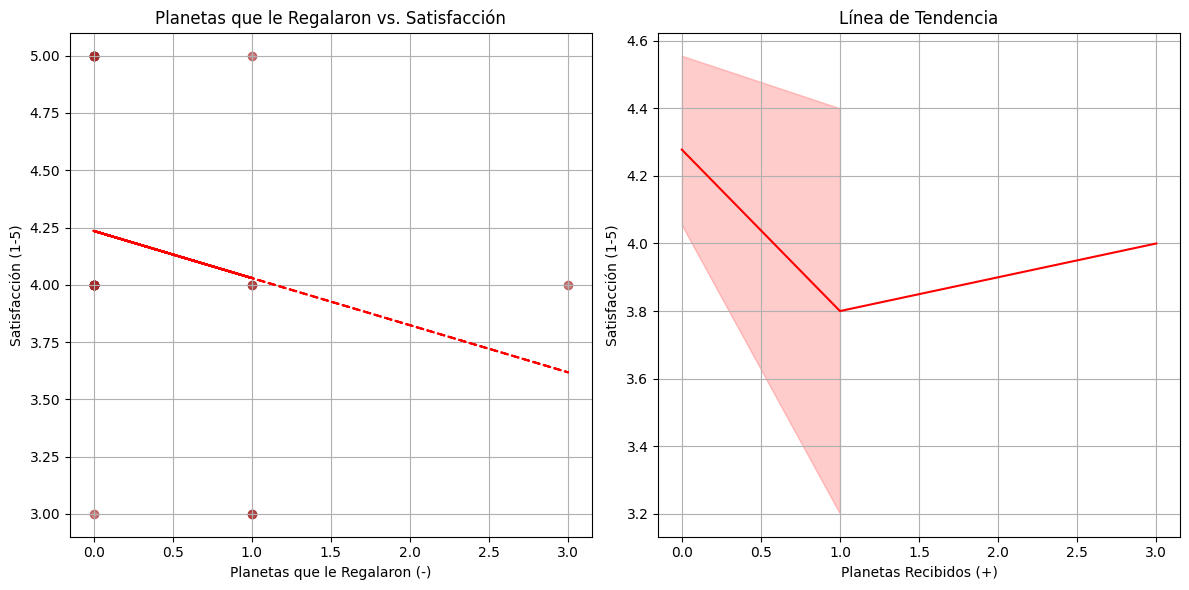

In [38]:
#Gráfico de dispersión
plt.figure(figsize=(12, 6))

#Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(df['PLANETAS RECIBIDOS (+)'], df['SATISFACCIÓN (1-5)'], color='brown', alpha=0.6)
plt.title('Planetas que le Regalaron vs. Satisfacción')
plt.xlabel('Planetas que le Regalaron (-)')
plt.ylabel('Satisfacción (1-5)')
plt.grid(True)

# Ajuste de línea de tendencia
slope, intercept, r_value, p_value, std_err = stats.linregress(df['PLANETAS RECIBIDOS (+)'], df['SATISFACCIÓN (1-5)'])
plt.plot(df['PLANETAS RECIBIDOS (+)'], intercept + slope * df['PLANETAS RECIBIDOS (+)'], color='red', linestyle='--')

# Gráfico de línea de tendencia
plt.subplot(1, 2, 2)
sns.lineplot(x='PLANETAS RECIBIDOS (+)', y='SATISFACCIÓN (1-5)', data=df, color='red')
plt.title('Línea de Tendencia')
plt.xlabel('Planetas Recibidos (+)')
plt.ylabel('Satisfacción (1-5)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [82]:
# Calcular la correlación
correlation = df['PLANETAS RECIBIDOS (+)'].corr(df['SATISFACCIÓN (1-5)'])
print(f'La correlación entre Planetas Recibidos (+) y Satisfacción (1-5) es: {correlation:.2f}')

La correlación entre Planetas Recibidos (+) y Satisfacción (1-5) es: -0.23
